In [1]:
# imports
import random
import itertools
import pandas
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# input data

n = int(input('Podaj liczbe niewiadomych: '))
wynik = int(input('Podaj wynik: '))
number_of_population = int(input("Podaj wielkość pierwszej populacji: "))
max_iteration = int(input("Podaj maksymalną liczbę iteracji: "))
mutation_rate = float(input('Podaj procent szansy na mutacje: '))
iteration = 0
init_population = []

for i in range(number_of_population):
    chrom = random.sample(range(0, wynik+1), n)
    init_population.append(chrom)

Podaj liczbe niewiadomych: 5
Podaj wynik: 20
Podaj wielkość pierwszej populacji: 200
Podaj maksymalną liczbę iteracji: 100
Podaj procent szansy na mutacje: 0.05


In [3]:
# fitness

def fitness(population): #population = init_population or new_population/children
    result_of_population = []
    
    for i in range(number_of_population):
        result = 0
        for j in range(n):
            result = result + population[i][j] * (j+1)

        if result == wynik:
            return [population[i]]

        result_of_population.append([i, result, abs(wynik - result)])
        
    result_of_population.sort(key = lambda x: x[2])
    return result_of_population


# crossover

def crossover(population, result_of_population):
    number_of_children = int(0.9*number_of_population)
    list_of_crossover = []
    children_population = []
    
    for i in range(number_of_children):
        x = random.randint(0, round(number_of_population/2))
        y = random.randint(0, round(number_of_population/2))
    
        while [x, y] in list_of_crossover or x == y:
                x = random.randint(0, round(number_of_population/2))
                y = random.randint(0, round(number_of_population/2))
            
        list_of_crossover.append([x, y])    


    for i in range(len(list_of_crossover)):
        first_parent = population[result_of_population[list_of_crossover[i][0]][0]][0:(round(n/2))]
        second_parent = population[result_of_population[list_of_crossover[i][1]][0]][(round(n/2)):n]

        child = first_parent + second_parent
        children_population.append(child)
        
    return children_population


# mutation and all next population

def mutation(children_population, population, result_of_population):
    for i in range(len(children_population)):
        if random.uniform(0,1.0) < mutation_rate:
            index_of_mut = random.randint(0, n-1)
            number_of_mut = random.randint(0, wynik+1)
            
            children_population[i][index_of_mut] = number_of_mut

    for j in range(int(0.1*number_of_population)):
        elit = population[result_of_population[j][0]]
        children_population.append(elit)

    return children_population

def all(iteration):
    while True:
        if iteration == max_iteration:
            print("Za duzo iteracji.")
            break
        if iteration == 0:
            fitness_result = fitness(init_population)
            if len(fitness_result) == 1:
                print("Koniec", fitness_result)
                break
            else:
                crossover_result = crossover(init_population, fitness_result)
                mutation_result = mutation(crossover_result, init_population, fitness_result)
                iteration += 1
        else:
            fitness_result = fitness(mutation_result)
            if len(fitness_result) == 1:
                print("Koniec", fitness_result)
                break
            else:
                crossover_result = crossover(mutation_result, fitness_result)
                mutation_result = mutation(crossover_result, mutation_result, fitness_result)
                iteration += 1
                
                
all(iteration)

Koniec [[4, 0, 1, 2, 1]]


In [4]:
# brute force method

def bruteForce():
    list_of_numbers = list(range(0, wynik+1))
    y = [p for p in itertools.product(list_of_numbers, repeat=n)]
    for i in range(len(y)):
        result_bf = 0
        for j in range(n):
            result_bf = result_bf + (y[i][j] * (j+1))

        if result_bf == wynik:
            print("Wynik równania: ", y[i])
            break
            
bruteForce()

Wynik równania:  (0, 0, 0, 0, 4)


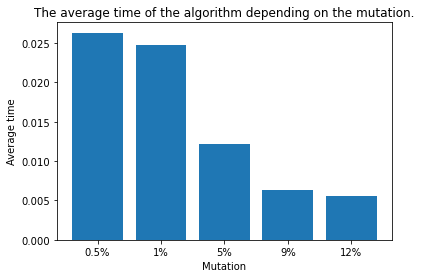

                Probability of not finding a solution  average time
Mutation = 0.5%                                  high        0.0263
Mutation = 1%                             high/medium        0.0248
Mutation=5%                                    medium        0.1220
Mutation = 9%                                     low        0.0063
Mutation = 12%                                    low        0.0055


In [14]:
values = [0.0263, 0.0248, 0.0122, 0.0063, 0.0055]
names = ("0.5%", "1%", "5%", "9%", "12%")
x = np.arange(len(names))

plt.bar(x, values)
plt.xticks(x, names)
plt.xlabel('Mutation')
plt.ylabel("Average time")
plt.title('The average time of the algorithm depending on the mutation.')
plt.show()

data = [["high", 0.0263],
["high/medium", 0.0248],
["medium", 0.122],
["low", 0.0063],
["low", 0.0055]] 
headers1=["Mutation = 0.5%", "Mutation = 1%","Mutation=5%", "Mutation = 9%", "Mutation = 12%"] 
headers2 = ["Probability of not finding a solution", "average time"]

print(pandas.DataFrame(data, headers1, headers2))

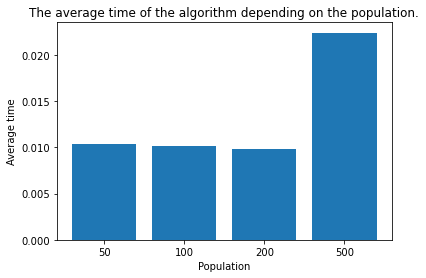

                average time
Population=50         0.0104
Population=100        0.0102
Population=200        0.0098
Population=500        0.0224


In [6]:
values = [0.0104, 0.0102, 0.0098, 0.0224]
names = ("50", "100", "200", "500")
x = np.arange(len(names))

plt.bar(x, values)
plt.xticks(x, names)
plt.xlabel('Population')
plt.ylabel("Average time")
plt.title('The average time of the algorithm depending on the population.')
plt.show()

data = [[0.0104],
[0.0102],
[0.0098],
[0.0224]] 
headers1=["Population=50", "Population=100", "Population=200", "Population=500"] 
headers2 = ["average time"]

print(pandas.DataFrame(data, headers1, headers2))

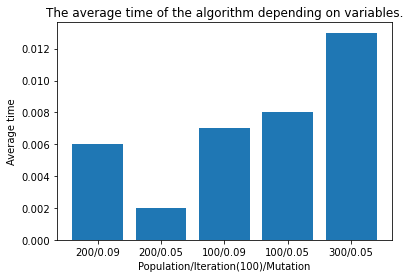

In [7]:
values = [0.006, 0.002, 0.007,0.008, 0.013]
names = ("200/0.09", "200/0.05", "100/0.09", "100/0.05", "300/0.05")
x = np.arange(len(names))

plt.bar(x, values)
plt.xticks(x, names)
plt.xlabel('Population/Iteration(100)/Mutation')
plt.ylabel("Average time")
plt.title('The average time of the algorithm depending on variables.')
plt.show()

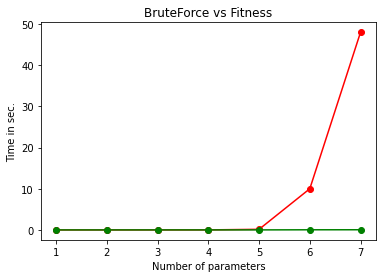

In [8]:
params = ["1", "2", "3", "4", "5", "6", "7"]
time1 = [0.00, 0.00, 0.001, 0.007, 0.148, 10.005, 48.03]
time2 = [0.00, 0.00, 0.003, 0.002, 0.005, 0.032, 0.039] 
plt.plot(params, time1, color='red', marker='o')
plt.plot(params, time2, color="green", marker='o')
plt.title('BruteForce vs Fitness')
plt.xlabel('Number of parameters')
plt.ylabel('Time in sec.')
plt.show()

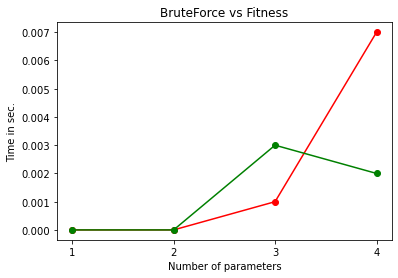

In [9]:
params = ["1", "2", "3", "4"]
time1 = [0.00, 0.00, 0.001, 0.007]
time2 = [0.00, 0.00, 0.003, 0.002] 
plt.plot(params, time1, color='red', marker='o')
plt.plot(params, time2, color="green", marker='o')
plt.title('BruteForce vs Fitness')
plt.xlabel('Number of parameters')
plt.ylabel('Time in sec.')
plt.show()

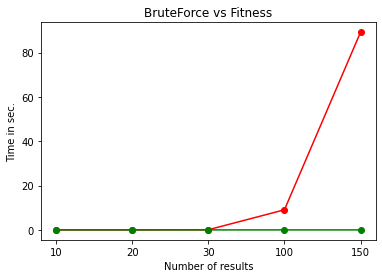

In [10]:
results = ["10", "20", "30", "100", "150"]
time1 = [0.002, 0.018, 0.077, 9.079, 89.199]
time2 = [0.002, 0.001, 0.004, 0.004, 0.004] 
plt.plot(results, time1, color='red', marker='o')
plt.plot(results, time2, color="green", marker='o')
plt.title('BruteForce vs Fitness')
plt.xlabel('Number of results')
plt.ylabel('Time in sec.')
plt.show()

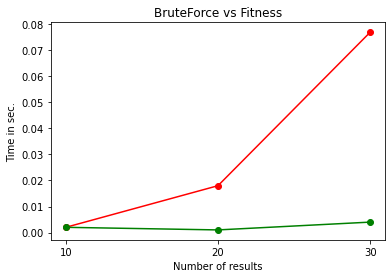

In [11]:
results = ["10", "20", "30"]
time1 = [0.002, 0.018, 0.077]
time2 = [0.002, 0.001, 0.004] 
plt.plot(results, time1, color='red', marker='o')
plt.plot(results, time2, color="green", marker='o')
plt.title('BruteForce vs Fitness')
plt.xlabel('Number of results')
plt.ylabel('Time in sec.')
plt.show()

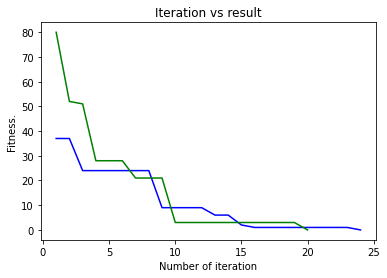

In [12]:
# Population: 200, mutation: 0.02, iteration:100, 5n, result: 20
# Population:200, mutation: 0.05, iteration: 100, 6n, result: 30
Y = [37, 37, 24, 24, 24, 24, 24, 24, 9, 9, 9, 9, 6, 6, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0]
X = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]
Y2 = [80, 52, 51, 28, 28, 28, 21, 21, 21, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0]
X2 = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
plt.plot(X, Y, color='blue')
plt.plot(X2, Y2, color='green')
plt.title('Iteration vs result')
plt.xlabel('Number of iteration')
plt.ylabel('Fitness.')
plt.show()

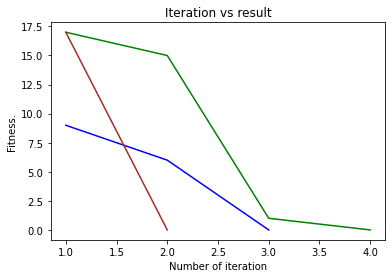

In [13]:
# Population: 200, iteration: 100, mutation: 0.05, 4n, result: 20
Y = [9, 6, 0]
X = [1,2,3]
Y2 = [17, 15, 1, 0]
X2 = [1,2,3,4]
Y3= [17, 0]
X3 = [1,2]
plt.plot(X, Y, color='blue')
plt.plot(X2, Y2, color='green')
plt.plot(X3, Y3, color='brown')
plt.title('Iteration vs result')
plt.xlabel('Number of iteration')
plt.ylabel('Fitness.')
plt.show()